# Trabajo Práctico 1
Para las imágenes que serán proporcionadas de Tito se pide:
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las
variaciones de contraste.
1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de
iluminación.

In [78]:
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [79]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

## 1. Pasaje a coordenadas cromáticas

In [80]:
def convert2RGB(img_input: np.array):
    return cv.cvtColor(img_input, cv.COLOR_BGR2RGB)

In [81]:
def print_image(img_input: np.array):
    img_plot = cv.cvtColor(img_input, cv.COLOR_BGR2RGB)
    plt.imshow(img_plot)  
    plt.show()

In [82]:
def splitRGB(img: np.array):
    im_r,im_g,im_b = cv.split(img)
    return im_r,im_g,im_b

In [83]:
def convert2CromCoord(img_input: np.array, stability = 0.0001):
    r, g, b = splitRGB(img_input)
    
    den = r + g + b + stability
    
    ch_1 = r/den
    ch_2 = g/den
    ch_3 = b/den

    img_cc = np.stack((ch_1, ch_2, ch_3), axis=-1) # equivalent cv.merge()
    return img_cc

In [84]:
# Read the imgs
img_cc_1 = cv.imread('./img/CoordCrom_1.png')
img_cc_2 = cv.imread('./img/CoordCrom_2.png')
img_cc_3 = cv.imread('./img/CoordCrom_3.png')

In [85]:
img_cc_1.shape

(996, 908, 3)

In [86]:
img_array = np.array([convert2RGB(img_cc_1), convert2RGB(img_cc_2), convert2RGB(img_cc_3)], dtype=int)
img_array.shape

(3, 996, 908, 3)

In [87]:
img_cc_array = np.zeros(img_array.shape)

for i, img in enumerate(img_array):
    img_cc_array[i] = convert2CromCoord(img)

/Users/ext_asalassa/.pyenv/versions/3.7.11/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


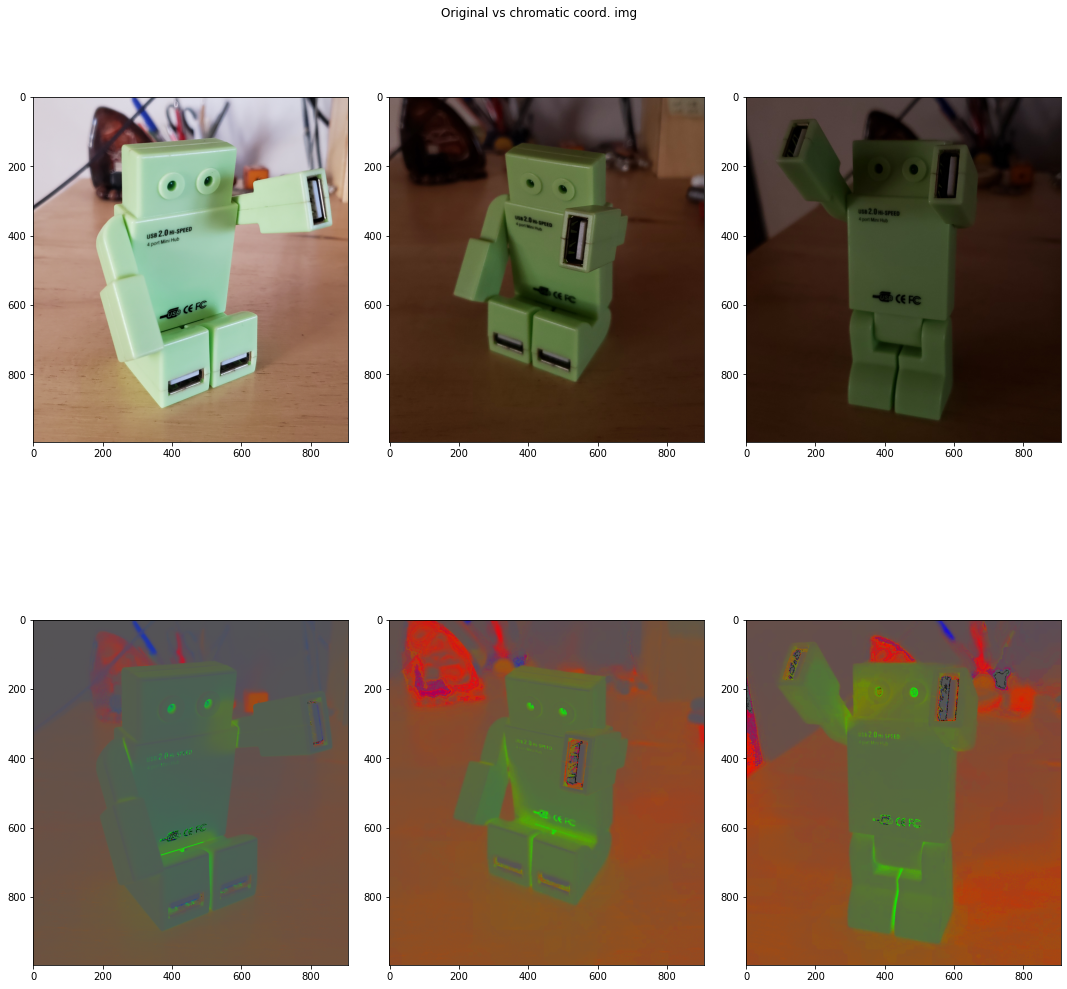

In [89]:
fig, axs = plt.subplots(2, len(img_array), figsize=(15,15))
fig.suptitle('Original vs chromatic coord. img')
fig.tight_layout() 
for i, img in enumerate(img_array):
    axs[0, i].imshow(img)
    axs[1, i].imshow(img_cc_array[i])

fig.show()

## 2. White-Patch

In [90]:
def withe_patch(img_input: np.array):
    r, g, b = cv.split(img_input)
    
    print(type(b))
    print(b)
    print(np.uint16(b) * 255)

    print(np.max(r), np.max(g), np.max(b))
    
    ch_1 = 255 / np.max(r) * r
    ch_2 = 255 / np.max(g) * g
    ch_3 = 255 / np.max(b) * b

    print(ch_3)
    
    img_wp = cv.merge([np.uint8(ch_1), np.uint8(ch_2), np.uint8(ch_3)])
    
    return img_wp

In [40]:
# Read the imgs
img_wp_1 = cv.imread('./img/WP_B.png')
img_wp_2 = cv.imread('./img/WP_O.png')
img_wp_3 = cv.imread('./img/WP_R.png')

In [41]:
print(img_wp_1.shape)
print(img_wp_2.shape)
print(img_wp_3.shape)

(565, 565, 3)
(607, 607, 3)
(565, 565, 3)


In [42]:
# Convert 2 RGB
img_wp_1 = cv.cvtColor(img_wp_1, cv.COLOR_BGR2RGB)
img_wp_2 = cv.cvtColor(img_wp_2, cv.COLOR_BGR2RGB)
img_wp_3 = cv.cvtColor(img_wp_3, cv.COLOR_BGR2RGB)

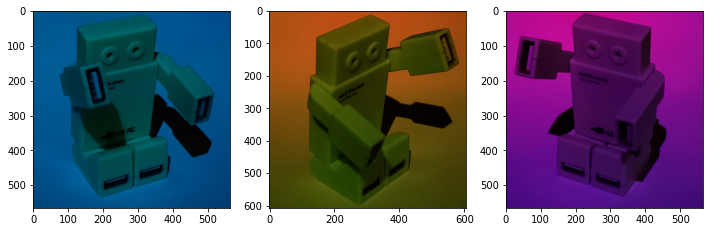

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(12,12))

axs[0].imshow(img_wp_1)
axs[1].imshow(img_wp_2)
axs[2].imshow(img_wp_3)

In [91]:
img_wp_tranf_1 = withe_patch(img_wp_1)
img_wp_tranf_2 = withe_patch(img_wp_2)
img_wp_tranf_3 = withe_patch(img_wp_3)

<class 'numpy.ndarray'>
[[141 140 140 ... 140 141 142]
 [144 141 143 ... 141 140 140]
 [145 141 142 ... 140 141 140]
 ...
 [124 124 124 ... 112 111 111]
 [121 124 124 ... 112 112 111]
 [123 124 123 ... 112 109 112]]
[[35955 35700 35700 ... 35700 35955 36210]
 [36720 35955 36465 ... 35955 35700 35700]
 [36975 35955 36210 ... 35700 35955 35700]
 ...
 [31620 31620 31620 ... 28560 28305 28305]
 [30855 31620 31620 ... 28560 28560 28305]
 [31365 31620 31365 ... 28560 27795 28560]]
31 118 166
[[216.59638554 215.06024096 215.06024096 ... 215.06024096 216.59638554
  218.13253012]
 [221.20481928 216.59638554 219.6686747  ... 216.59638554 215.06024096
  215.06024096]
 [222.74096386 216.59638554 218.13253012 ... 215.06024096 216.59638554
  215.06024096]
 ...
 [190.48192771 190.48192771 190.48192771 ... 172.04819277 170.51204819
  170.51204819]
 [185.87349398 190.48192771 190.48192771 ... 172.04819277 172.04819277
  170.51204819]
 [188.94578313 190.48192771 188.94578313 ... 172.04819277 167.4397590

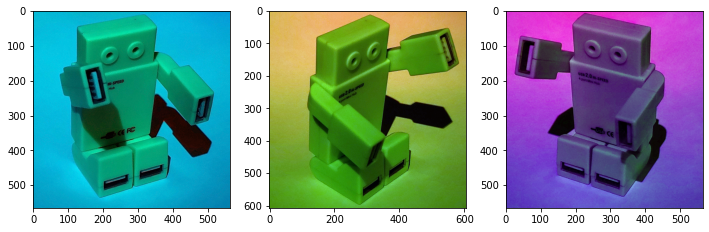

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(12,12))

axs[0].imshow(img_wp_tranf_1)
axs[1].imshow(img_wp_tranf_2)
axs[2].imshow(img_wp_tranf_3)

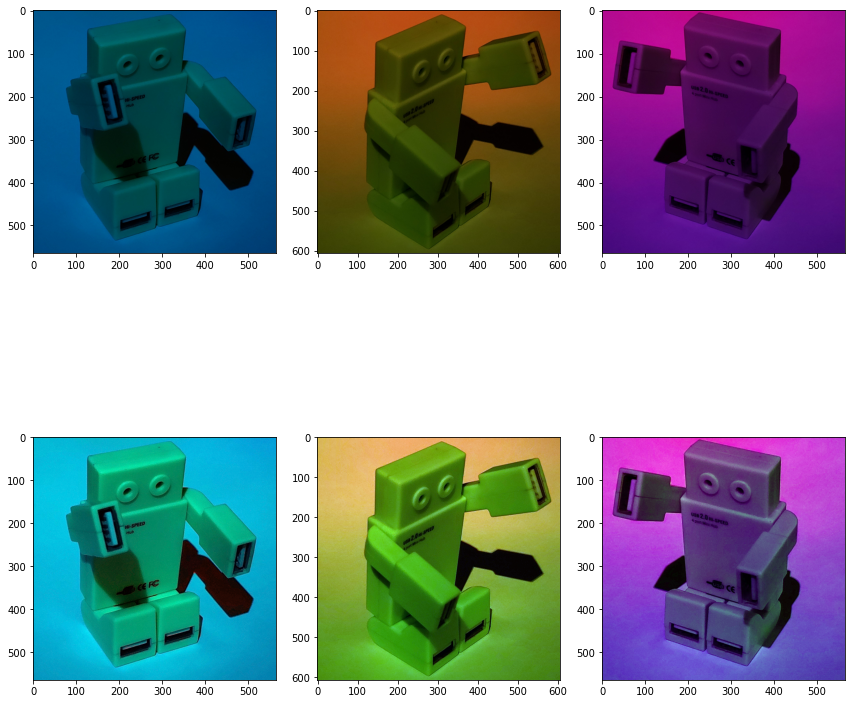

In [95]:
fig, axs = plt.subplots(2, 3, figsize=(12,12))
fig.tight_layout() 

axs[0,0].imshow(img_wp_1)
axs[0,1].imshow(img_wp_2)
axs[0,2].imshow(img_wp_3)

axs[1,0].imshow(img_wp_tranf_1)
axs[1,1].imshow(img_wp_tranf_2)
axs[1,2].imshow(img_wp_tranf_3)